In [55]:
# import stuff based on the provided assignments

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm
import pandas as pd
from pyfinance.options import BSM
from mpl_toolkits.mplot3d import Axes3D
from datar import f
from datar.dplyr import mutate, filter, if_else, pull, group_by, select

[2021-11-01 22:00:07][datar][WARNING] Builtin name "filter" has been overriden by datar.


In [25]:
# Read given file from data folder in same working directory

xls = pd.ExcelFile('data/isx2010C.xls')
print('All sheets in the file')
sheets = xls.sheet_names
sheets

All sheets in the file


['isx15012010C',
 'isx19022010C',
 'isx17122010C',
 'isx19112010C',
 'isx15102010C',
 'isx17092010C',
 'isx20082010C',
 'isx16072010C',
 'isx18062010C',
 'isx21052010C',
 'isx16042010C',
 'isx19032010C']

In [89]:
# ordering for the sheets

sheet_order = [0,1,11,10,9,8,7,6,5,4,3,2]
for i in sheet_order:
    print(sheets[i])
    day = sheets[i][3:5]
    month = sheets[i][5:7]
    year = sheets[i][7:11]
    print(day, month, year)
    print()

isx15012010C
15 01 2010

isx19022010C
19 02 2010

isx19032010C
19 03 2010

isx16042010C
16 04 2010

isx21052010C
21 05 2010

isx18062010C
18 06 2010

isx16072010C
16 07 2010

isx20082010C
20 08 2010

isx17092010C
17 09 2010

isx15102010C
15 10 2010

isx19112010C
19 11 2010

isx17122010C
17 12 2010



In [61]:
df_1 = pd.read_excel(xls, sheets[0])
df_1

,2009-09-21 00:00:00,340,345,350,355,360,365,370,375,380,...,540,545,550,555,560,565,570,Unnamed: 48,Unnamed: 49,date
,<int64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,...,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<object>
0,86,152.20,NaN,NaN,NaN,132.60,NaN,NaN,NaN,113.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,491.34,0.11,21.9.2009
1,85,155.05,NaN,NaN,NaN,135.35,NaN,NaN,NaN,115.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,494.35,0.11,22.9.2009
2,84,152.40,NaN,NaN,NaN,132.70,NaN,NaN,NaN,113.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490.36,0.11,23.9.2009
3,83,147.00,NaN,NaN,NaN,127.25,NaN,NaN,NaN,108.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,486.99,0.11,24.9.2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,82,145.55,NaN,NaN,NaN,125.95,NaN,NaN,NaN,106.75,...,3.80,NaN,NaN,NaN,1525.00,NaN,NaN,484.11,0.11,25.9.2009
81,5,185.50,180.50,175.50,170.50,165.50,160.50,155.50,150.50,145.50,...,0.10,0.07,0.05,0.05,0.05,0.05,0.05,524.29,0.06,12.1.2010
82,4,188.55,183.55,178.55,173.55,168.55,163.55,158.55,153.55,148.55,...,0.15,0.07,0.05,0.05,0.05,0.15,0.15,527.93,0.06,13.1.2010
83,3,190.10,185.10,180.10,175.10,170.10,165.10,160.10,155.10,150.10,...,0.05,0.05,0.02,0.05,0.05,0.15,0.05,529.59,0.06,14.1.2010


In [68]:
# Read data and melt into useable format

df_1 = pd.read_excel(xls, sheets[0])
df_1.rename({df_1.columns[0]:'T','Unnamed: 48': 'S', 'Unnamed: 49': 'r'}, axis='columns', inplace=True)
df_1.drop(['date'],axis=1,inplace=True)
df_1 = df_1.melt(id_vars=['T', 'r', 'S'], var_name="E").dropna()
df_1.rename({'value':'Cobs'}, axis='columns', inplace=True)
df_1 = df_1  >> mutate(r = f.r/100, Mat = f.T, T = f.T/252, S = f.S/1000, E = f.E/1000, Cobs = f.Cobs/1000)
df_1

,T,r,S,E,Cobs,Mat
,<float64>,<float64>,<float64>,<object>,<float64>,<int64>
0,0.341270,0.0011,0.49134,0.34,0.15220,86
1,0.337302,0.0011,0.49435,0.34,0.15505,85
2,0.333333,0.0011,0.49036,0.34,0.15240,84
3,0.329365,0.0011,0.48699,0.34,0.14700,83
...,...,...,...,...,...,...
4,0.325397,0.0011,0.48411,0.34,0.14555,82
4036,0.023810,0.0006,0.52861,0.57,0.00005,6
4037,0.019841,0.0006,0.52429,0.57,0.00005,5
4038,0.015873,0.0006,0.52793,0.57,0.00015,4


Here `T` refers to days until maturity, `S` refers to stock prices and `Cobs` to call prices, `E` for strikes and `r` for risk-free interest rates.

|      |          T |      r |       S |    E |    Cobs |   Mat |       delta |
|-----:|-----------:|-------:|--------:|-----:|--------:|------:|------------:|
| 2408 | 0.34127    | 0.0011 | 0.49134 | 0.48 | 0.0298  |    86 | nan         |
| 2409 | 0.337302   | 0.0011 | 0.49435 | 0.48 | 0.0314  |    85 |   0.531561  |
| 2410 | 0.333333   | 0.0011 | 0.49036 | 0.48 | 0.02955 |    84 |   0.463659  |
| 2411 | 0.329365   | 0.0011 | 0.48699 | 0.48 | 0.02695 |    83 |   0.771513  |
| 2412 | 0.325397   | 0.0011 | 0.48411 | 0.48 | 0.0257  |    82 |   0.434028  |
| 2413 | 0.321429   | 0.0011 | 0.49169 | 0.48 | 0.0293  |    81 |   0.474934  |
| 2414 | 0.31746    | 0.0011 | 0.49025 | 0.48 | 0.0278  |    80 |   1.04167   |
| 2415 | 0.313492   | 0.0011 | 0.48835 | 0.48 | 0.02725 |    79 |   0.289474  |
| 2416 | 0.309524   | 0.0011 | 0.47671 | 0.48 | 0.02175 |    78 |   0.472509  |
| 2417 | 0.305556   | 0.0012 | 0.47548 | 0.48 | 0.0206  |    77 |   0.934959  |
| 2418 | 0.301587   | 0.0012 | 0.48175 |

/tmp/ipykernel_4586/2588219097.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  option_1['delta'] = option_1['Cobs'].diff() / option_1['S'].diff()


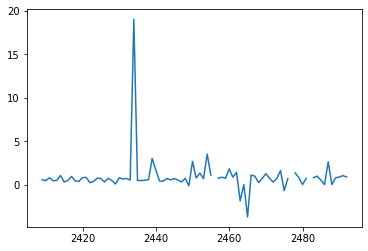

In [88]:
# calculate delta for given strike
# This could possible be replaced by calculating IV and using that to calculate delta
# as these numbers are quite inaccurate at times

startingprice = 0.491
strike_1 = 0.48
option_1 = df_1[df_1['E'] == strike_1]

option_1['delta'] = option_1['Cobs'].diff() / option_1['S'].diff()
plt.plot(option_1['delta'])

print(option_1.to_markdown())